In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
x = np.random.randn(1000)
noise = np.random.randn(1000)
w = np.random.uniform(0,5)
c = np.random.uniform(0,5)

y = w*x + c+ noise

train_data = pd.DataFrame({"x":x, "noise":noise,"y":y})

print(f"y = {w} * x + {c} + noise")

y = 4.660509631642861 * x + 4.7845083104053785 + noise


In [103]:
train_data

,x,noise,y
0,-0.896630,0.481590,1.087343
1,-0.965667,0.152500,0.436511
2,-0.890330,-0.405566,0.229550
3,0.139877,1.894766,7.331174
4,0.871771,-0.208541,8.638863
...,...,...,...
995,-0.988094,0.129737,0.309224
996,0.683493,0.696712,8.666647
997,-1.510575,1.220632,-1.034908
998,0.648735,0.167106,7.975052


In [104]:
train_data['p'] = (1/(1+np.exp(-y)))

In [105]:
train_data

,x,noise,y,p
0,-0.896630,0.481590,1.087343,0.747881
1,-0.965667,0.152500,0.436511,0.607427
2,-0.890330,-0.405566,0.229550,0.557137
3,0.139877,1.894766,7.331174,0.999346
4,0.871771,-0.208541,8.638863,0.999823
...,...,...,...,...
995,-0.988094,0.129737,0.309224,0.576696
996,0.683493,0.696712,8.666647,0.999828
997,-1.510575,1.220632,-1.034908,0.262134
998,0.648735,0.167106,7.975052,0.999656


In [106]:
threshold = 0.5
train_data['p_prob']= (train_data['p'] > threshold).astype(int)
train_data

,x,noise,y,p,p_prob
0,-0.896630,0.481590,1.087343,0.747881,1
1,-0.965667,0.152500,0.436511,0.607427,1
2,-0.890330,-0.405566,0.229550,0.557137,1
3,0.139877,1.894766,7.331174,0.999346,1
4,0.871771,-0.208541,8.638863,0.999823,1
...,...,...,...,...,...
995,-0.988094,0.129737,0.309224,0.576696,1
996,0.683493,0.696712,8.666647,0.999828,1
997,-1.510575,1.220632,-1.034908,0.262134,0
998,0.648735,0.167106,7.975052,0.999656,1


In [107]:
def logistic_regression(df, interation=1000, learning_rate = 0.01, threshold = 0.5):
    x = df['x'].values
    p = df['p'].values

    loss_list = []

    ## Initializing w and c
    w_hat = np.random.uniform(0,5)
    c_hat = np.random.uniform(0,5)

    for i in range(interation):
        y_hat = w_hat * x + c_hat
        p_hat = (1/(1+np.exp(-y_hat)))

        ## Calculating the gradient discent and then adjusting the weights and bias
        loss = -np.mean(p * np.log(p_hat + 1e-15) + (1 - p) * np.log(1 - p_hat + 1e-15))
        loss_list.append(loss)

        error = p_hat - p
        dw = np.mean(error * x)
        dc = np.mean(error)

        w_hat -= learning_rate*dw
        c_hat -= learning_rate*dc
    
    y_hat = w_hat * x + c_hat
    p_hat = (1/(1+np.exp(-y_hat)))
    p_hat_prob = (p_hat > threshold).astype(int)
    new_df = df.copy()
    new_df['predicted'] = p_hat_prob

    return new_df,w_hat,c_hat,loss_list



    

In [108]:
new_df,w_pred,c_pred,loss_list = logistic_regression(df=train_data)
w_pred,c_pred

(np.float64(1.458854595560013), np.float64(1.8531063572557591))

In [109]:
## Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Accuracy is : ${accuracy_score(new_df['p_prob'],new_df['predicted'])}")

print(f"Confustion metrics is : ${confusion_matrix(new_df['p_prob'],new_df['predicted'])}")

Accuracy is : $0.941
Confustion metrics is : $[[ 83  56]
 [  3 858]]


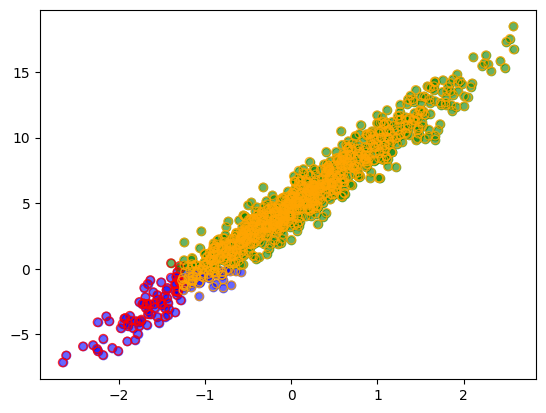

In [110]:
import matplotlib.pyplot as plt

# Separate real classes
class0 = new_df[new_df['p_prob'] == 0]  # true 0
class1 = new_df[new_df['p_prob'] == 1]  # true 1

# Scatter actual points
plt.scatter(class0['x'], class0['y'], color='blue', label='Actual Class 0', alpha=0.6)
plt.scatter(class1['x'], class1['y'], color='green', label='Actual Class 1', alpha=0.6)

# Predicted points
pred0 = new_df[new_df['predicted'] == 0]
pred1 = new_df[new_df['predicted'] == 1]
plt.scatter(pred0['x'], pred0['y'], edgecolors='red', facecolors='none', label='Predicted Class 0', alpha=0.8)
plt.scatter(pred1['x'], pred1['y'], edgecolors='orange', facecolors='none', label='Predicted Class 1', alpha=0.8)


In [111]:
train_data['x'].shape

(1000,)

## Polynomial logistic regression

In [112]:
def polynomial_logistic_regression(df, interation=1000, learning_rate = 0.01, threshold = 0.5, degree = 3):
    x = df['x'].values
    p = df['p'].values

    X_poly = np.vstack([x**i for i in range(0,degree+1)]).T
    w_hat = np.random.uniform(0,5,size=(degree+1,))


    loss_list = []

    ## Initializing w and c
    # w_hat = np.random.uniform(0,5)
    c_hat = np.random.uniform(0,5)

    for i in range(interation):
        y_hat = X_poly @ w_hat + c_hat

        p_hat = (1/(1+np.exp(-y_hat)))

        ## Calculating the gradient discent and then adjusting the weights and bias
        loss = -np.mean(p * np.log(p_hat + 1e-15) + (1 - p) * np.log(1 - p_hat + 1e-15))
        loss_list.append(loss)

        error = p_hat - p
        dw = X_poly.T @ error/len(x)
        dc = np.mean(error)

        w_hat -= learning_rate*dw
        c_hat -= learning_rate*dc
    
    y_hat = X_poly @ w_hat + c_hat
    p_hat = (1/(1+np.exp(-y_hat)))
    p_hat_prob = (p_hat > threshold).astype(int)
    new_df = df.copy()
    new_df['predicted'] = p_hat_prob

    return new_df,w_hat,c_hat,loss_list


In [113]:
new_df,w_pred,c_pred,loss_list = polynomial_logistic_regression(df=train_data)
w_pred,c_pred

(array([2.28805487, 1.66977905, 1.86129873, 2.38755346]),
 np.float64(1.362903816582146))

In [114]:
print(f"Accuracy is : ${accuracy_score(new_df['p_prob'],new_df['predicted'])}")

print(f"Confustion metrics is : ${confusion_matrix(new_df['p_prob'],new_df['predicted'])}")

Accuracy is : $0.944
Confustion metrics is : $[[ 89  50]
 [  6 855]]
